<a href="https://colab.research.google.com/github/sdas1011/Mini-Project/blob/main/minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MINI PROJECT** - image classification using machine learning

Name: Supratim Das

email: sdas1011@gmail.com

---



In [6]:
!pip install bing-image-downloader

In [7]:
cd /content/drive/My Drive/MinorProject1

/content/drive/My Drive/MinorProject1


**GATHERING DATA** - downloading images

In [8]:
from bing_image_downloader import downloader
downloader.download('banana fruit', limit=30,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download('orange fruit', limit=30,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)

[%] Downloading Images to /content/drive/My Drive/MinorProject1/images/banana fruit


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://vinepair.com/wp-content/uploads/2015/04/banana-beer-social.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.lima-europe.eu/wp-content/uploads/2017/04/Banana.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.interestingfacts.org/wp-content/uploads/2010/08/Banana.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://4.bp.blogspot.com/-PvXwAPpg4ho/UF_ZKJIY9oI/AAAAAAAAAbw/-U5QTwpj5Bg/s400/banana_feira.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/09/ad/c8/09adc8b2a18794f1c0469c9f890714bb.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://1.bp.blogspot.com/-_HpJ9FsQSxU/V4OOZnQfAFI/AAAAAAAACNU/Zm6aRIIwlIESPjvfLmN7DhGQR_Pck9xygCPcBGAYYCw/s1600/Banana.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://

**PREPROCESSING DATA**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread # To normalize the pixel values
from skimage.transform import resize

Image_1.jpg


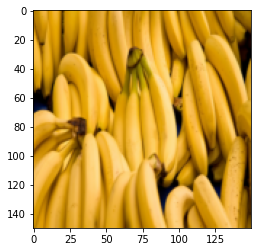

Image_2.jpg


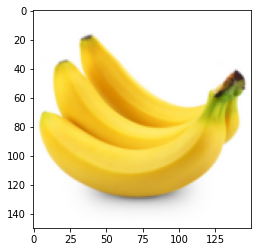

Image_3.jpg


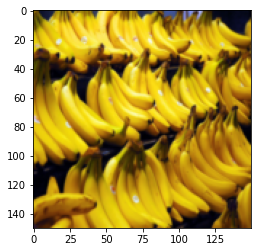

Image_4.jpg


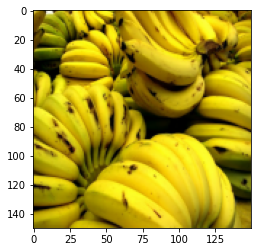

Image_5.jpg


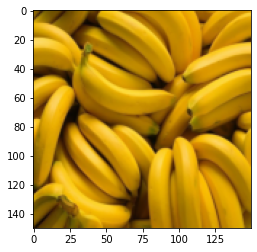

Image_6.jpg


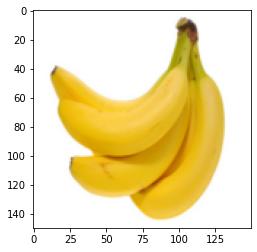

Image_7.jpg


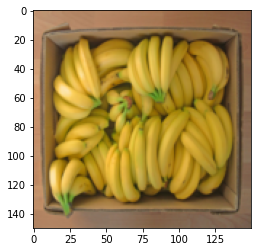

Image_8.jpg


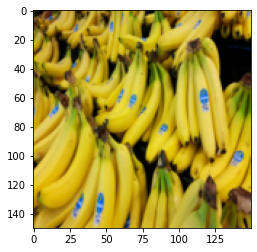

Image_9.jpg


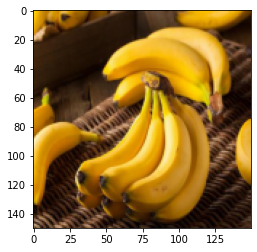

Image_10.jpg


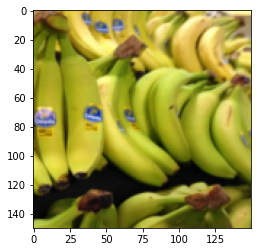

Image_11.jpg


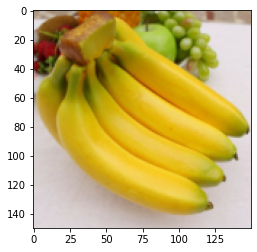

Image_12.jpg


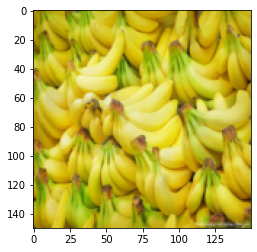

Image_13.jpg


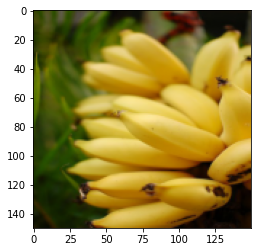

Image_14.jpg


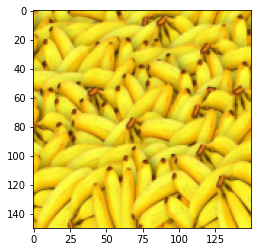

Image_15.jpg


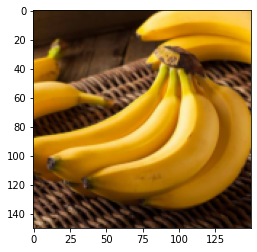

Image_16.jpg


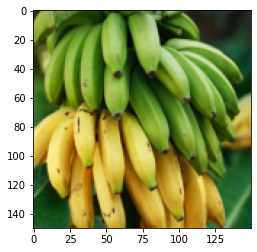

Image_17.jpg


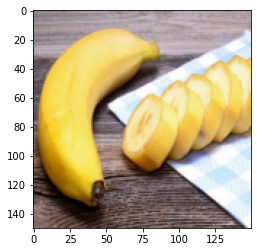

Image_18 (1).jpg


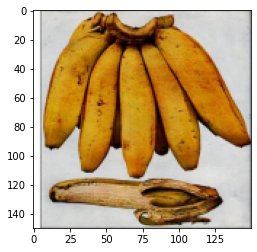

Image_19 (1).jpg


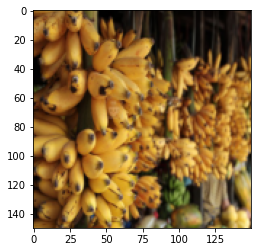

Image_20 (1).jpg


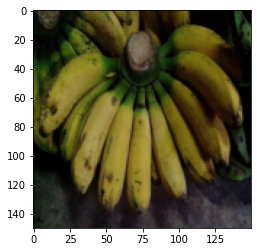

Image_21 (1).jpg


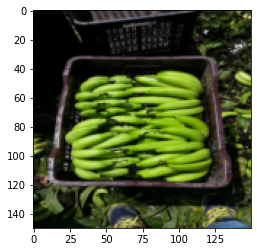

Image_22 (1).jpg


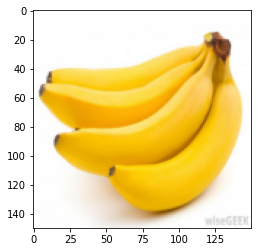

Image_23 (1).jpg


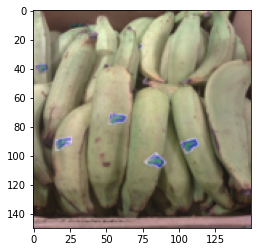

Image_24 (1).jpg


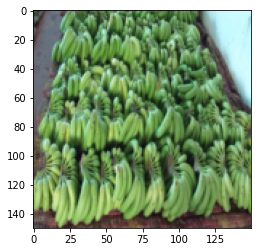

Image_25.jpg


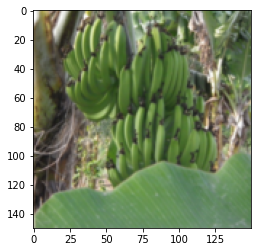

Image_26 (1).jpg


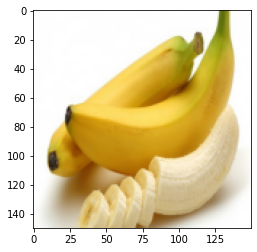

Image_27 (1).jpg


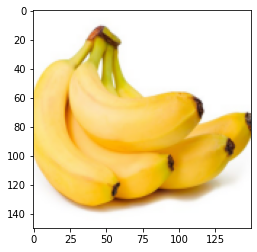

Image_28 (1).jpg


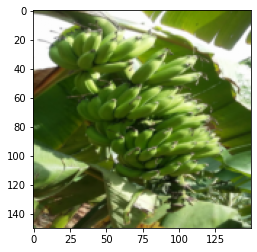

Image_29 (1).jpg


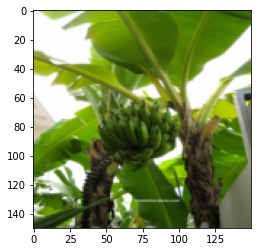

Image_30 (1).jpg


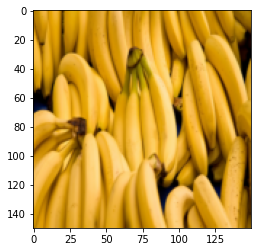

Image_18.jpg


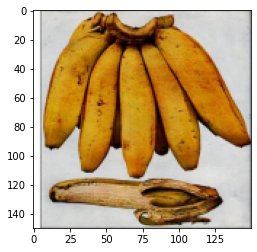

Image_19.jpg


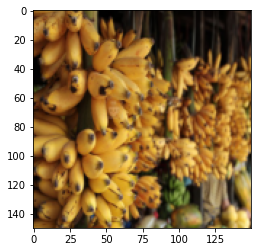

Image_20.jpg


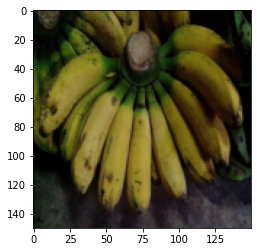

Image_21.jpg


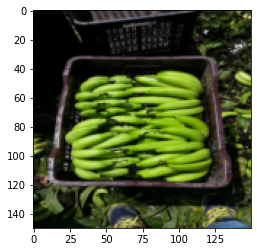

Image_22.jpg


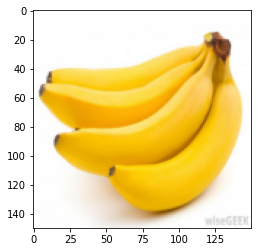

Image_23.jpg


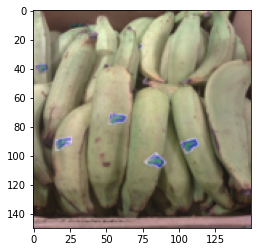

Image_24.jpg


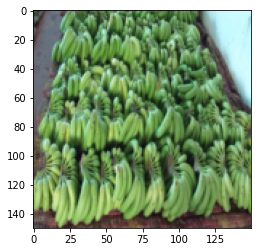

Image_25.png


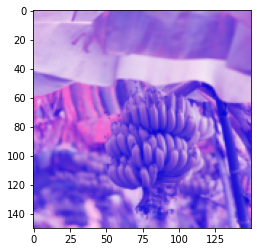

Image_26.jpg


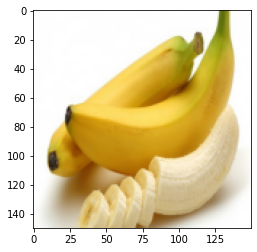

Image_27.jpg


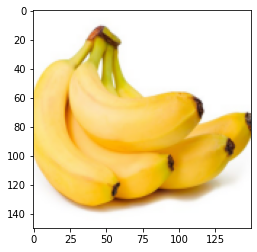

Image_28.jpg


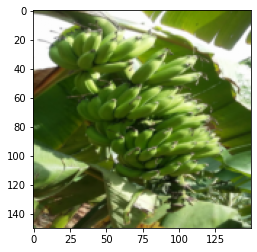

Image_29.jpg


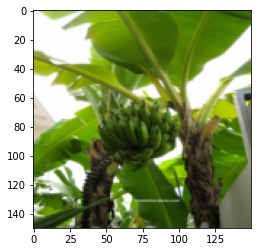

Image_30.jpg


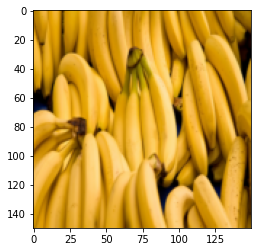

Image_1.jpg


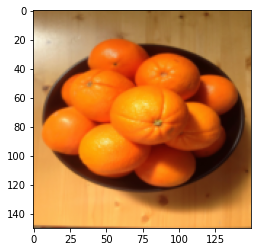

Image_2.jpg


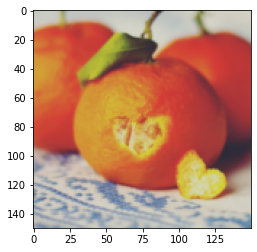

Image_3.jpg


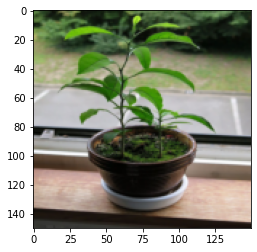

Image_4.jpg


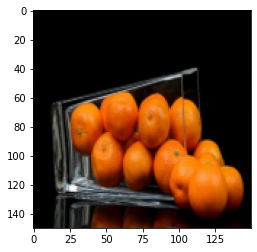

Image_5.jpg


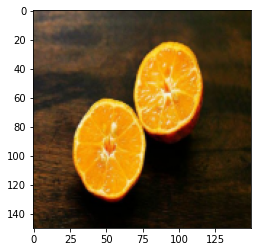

Image_6.jpg


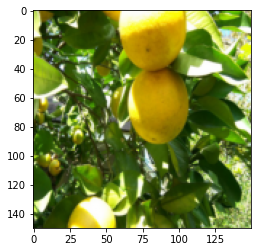

Image_7.jpg


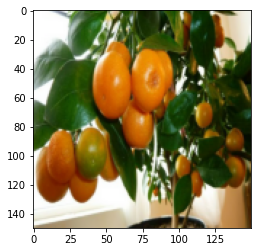

Image_8.jpg


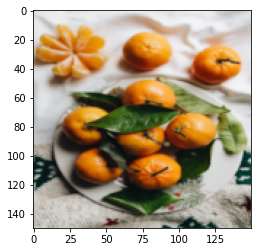

Image_9.jpg


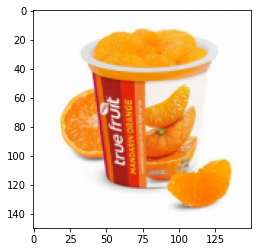

Image_10.png


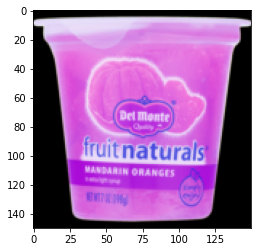

Image_11.jpg


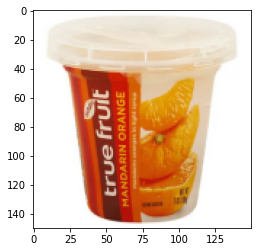

Image_12.jpg


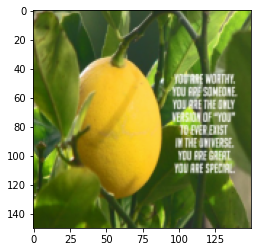

Image_13.jpeg


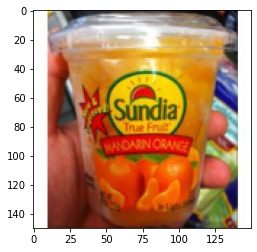

Image_14.jpg


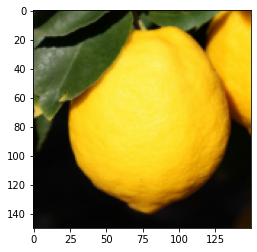

Image_15.jpg


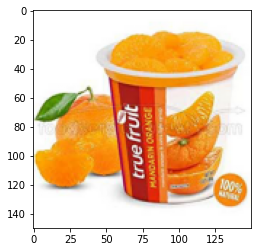

Image_16.jpg


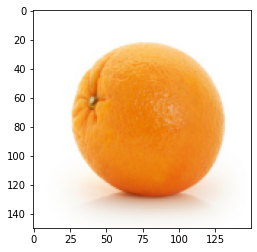

Image_17.jpg


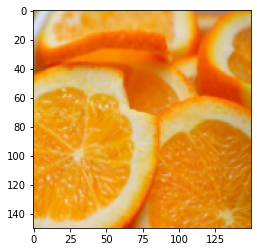

Image_18.jpg


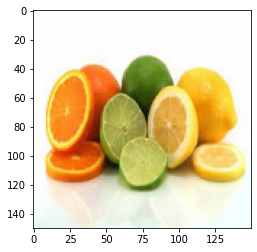

Image_19.png


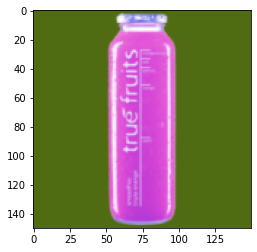

Image_20.jpg


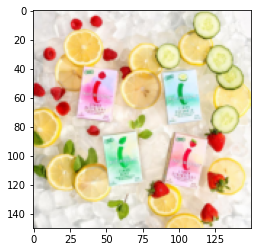

Image_21.jpg


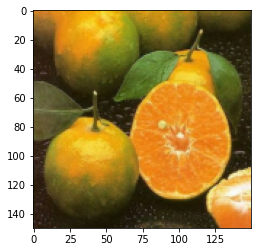

Image_22.jpg


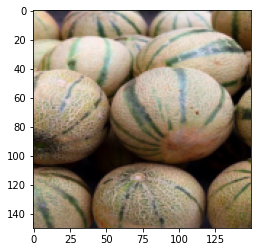

Image_23.png


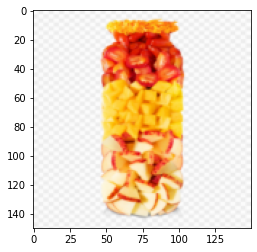

Image_24.jpg


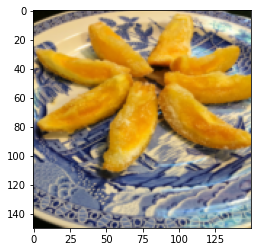

Image_25.png


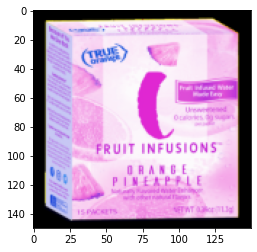

Image_26.jpg


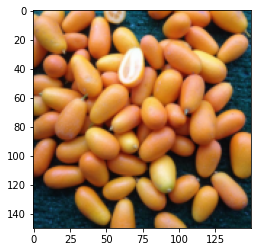

Image_27.png


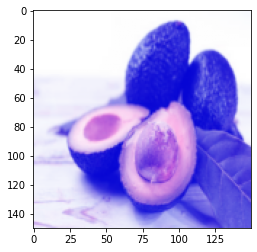

Image_28.jpg


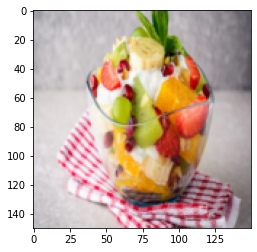

Image_29.jpg


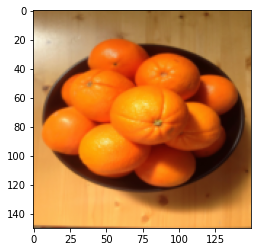

Image_30.jpg


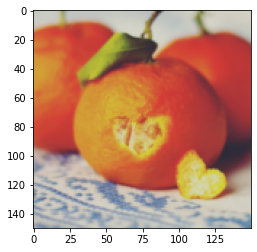

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

datadir = '/content/drive/MyDrive/MinorProject1/images'

categories = ['banana fruit','orange fruit'] 
target = []
flat_data = []

for i in categories:
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    print(img)
    img_array = imread(os.path.join(path,img))

    img_resize = resize(img_array,(150,150,3)) # Value gets converted 0-1 from 0-255
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(i)
    plt.imshow(img_resize)
    plt.show()


flat_data = np.array(flat_data)
target = np.array(target)

In [10]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target


In [11]:
df['target']= [1 if i=='banana fruit' else 0 for i in df.Target]

In [12]:
df

0         1         2  ...     67499        Target  target
0   0.690196  0.467824  0.003922  ...  0.000000  banana fruit       1
1   1.000000  1.000000  1.000000  ...  1.000000  banana fruit       1
2   0.523112  0.440654  0.043137  ...  0.039216  banana fruit       1
3   0.931699  0.917320  0.720915  ...  0.023856  banana fruit       1
4   0.581830  0.432810  0.001438  ...  0.011765  banana fruit       1
..       ...       ...       ...  ...       ...           ...     ...
68  0.100004  0.351512  0.385233  ...  0.161830  orange fruit       0
69  1.000000  1.000000  1.000000  ...  0.869281  orange fruit       0
70  0.585137  0.591333  0.619608  ...  0.402353  orange fruit       0
71  0.600000  0.443137  0.258824  ...  0.250039  orange fruit       0
72  0.776471  0.784353  0.756902  ...  0.643490  orange fruit       0

[73 rows x 67502 columns]

In [13]:
x = df.iloc[:, :67500].values
y = df.iloc[:, 67501].values

**HYPERPARAMETER TUNING and model building using SVM and GridSearchCV**

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid= {'C':[0.1,1,10,100,1000],'kernel':['rbf','linear','poly']}
model=GridSearchCV(SVC(),param_grid)
model.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [16]:
y_pred=model.predict(x_test)

**EVALUATING THE MODEL**

In [17]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred,y_test)

0.7894736842105263

In [18]:
from sklearn.metrics import confusion_matrix
a=confusion_matrix(y_pred,y_test)
a

array([[6, 0],
       [4, 9]])

In [19]:
# 5 - True Negative
# 9 - True Positive
# 0 - False Positive
# 5 - False Negative

In [20]:
TN=a[0][0]
TP=a[1][1]
FP=a[0][1]
FN=a[1][0]

print(f"Accuracy Score={(TN+TP)/(TN+TP+FN+FP)}")

Accuracy Score=0.7894736842105263


In [21]:
print (f"Precision Positive or 1 = {TP/(TP+FP)}")
print(f"Precision Negative or 0 = {TN/(TN+FN)}")
print(f"Recall Postive or 1  = {TP/(TP+FN)}")
print(f"Recall Negative or 0 = {TN/(TN+FP)}")

Precision Positive or 1 = 1.0
Precision Negative or 0 = 0.6
Recall Postive or 1  = 0.6923076923076923
Recall Negative or 0 = 1.0


In [22]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.69      0.82        13

    accuracy                           0.79        19
   macro avg       0.80      0.85      0.78        19
weighted avg       0.87      0.79      0.80        19



**PREDICTING for new image**

In [23]:
images = []
flattened_images = []

DATADIR = '/content/drive/My Drive/MinorProject1/TestImages'

for img in os.listdir(DATADIR):
  img_array = imread(os.path.join(DATADIR,img))
  img_resized = resize(img_array,(150,150,3))
  flattened_images.append(img_resized.flatten())
  images.append(img_resized)

images = np.array(images)
flattened_images = np.array(flattened_images)

In [24]:
df1 = pd.DataFrame(flattened_images)
test = df1.iloc[:, :67501].values

Orange
Banana


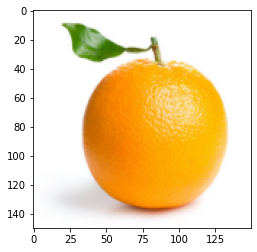

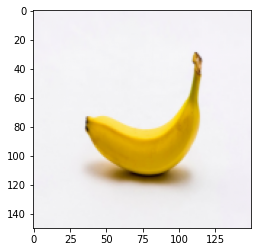

In [25]:
pred = model.predict(test)
import matplotlib.pyplot as plt
for i in range(len(images)):
  plt.figure()
  print('Orange' if pred[i] == 0 else 'Banana')
  plt.imshow(images[i])